In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
class_count = df['Class'].value_counts()
class_0_count = class_count[0]
class_1_count = class_count[1]

In [5]:
df['Class'].value_counts() / len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

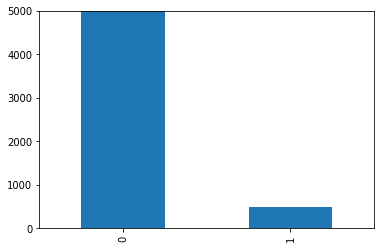

In [6]:
class_count.plot(kind='bar', ylim=(0, 5000))

In [7]:
amounts = df['Amount'].values
times = df['Time'].values

In [8]:
amounts.shape

(284807,)

In [9]:
amounts.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [10]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(amounts.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(times.reshape(-1, 1))

# df.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.296653,1.034951
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.038986,1.034963
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.641096,1.034975
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.167680,1.034975


In [12]:
df.iloc[[0, 2]]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [14]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
274860,166248.0,-0.058441,0.592053,0.119334,-0.380352,1.069272,-1.161934,1.335538,-0.922225,0.304326,...,-0.200743,-0.048938,-0.386880,-0.251251,-0.616839,-0.267098,0.89,0,-0.294977,0.958141
149869,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1,-0.055893,0.086937
93992,64682.0,-0.614367,0.174951,2.248539,-0.228299,-0.431119,-0.166880,-0.213377,0.409868,0.493560,...,-0.023647,0.312254,-0.641578,0.085848,0.121608,0.150450,1.00,0,-0.293440,-0.235083
15451,26833.0,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,...,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,99.99,1,1.089779,-0.679742
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1,-0.307413,-0.005733


In [15]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.010596,1.000000
V1,0.117396,1.000000e+00,-7.510947e-17,-7.183470e-16,-2.201468e-16,5.050552e-16,1.237508e-16,-2.148138e-17,1.347729e-17,5.736088e-17,...,1.581218e-16,-6.967023e-17,-1.610807e-16,-1.734860e-16,1.668123e-16,4.014580e-16,-0.227709,-0.101347,-0.227709,0.117396
V2,-0.010593,-7.510947e-17,1.000000e+00,-2.362222e-17,-2.471221e-16,6.556322e-17,2.556064e-16,-3.284444e-16,6.216378e-17,-1.170999e-16,...,2.243539e-16,-1.194120e-16,7.622892e-17,2.441054e-16,-5.069933e-16,-4.019792e-16,-0.531409,0.091289,-0.531409,-0.010593
V3,-0.419618,-7.183470e-16,-2.362222e-17,1.000000e+00,-2.886634e-16,-4.164421e-16,1.493789e-15,2.141700e-16,3.495162e-17,9.312146e-17,...,-1.687248e-16,-8.112461e-18,6.671115e-17,-2.350871e-16,4.881536e-16,7.918281e-16,-0.210880,-0.192961,-0.210880,-0.419618
V4,-0.105260,-2.201468e-16,-2.471221e-16,-2.886634e-16,1.000000e+00,-1.921028e-15,-4.225727e-16,-6.867705e-17,6.311486e-16,5.872972e-16,...,2.087152e-16,1.418360e-16,6.557664e-16,-3.967146e-16,-8.677517e-17,-1.151377e-17,0.098732,0.133447,0.098732,-0.105260
V5,0.173072,5.050552e-16,6.556322e-17,-4.164421e-16,-1.921028e-15,1.000000e+00,6.028555e-16,3.297740e-16,4.190746e-16,4.974976e-16,...,1.728061e-16,-9.575402e-16,-1.603149e-16,3.032488e-16,2.841467e-16,-2.591869e-16,-0.386356,-0.094974,-0.386356,0.173072
V6,-0.063016,1.237508e-16,2.556064e-16,1.493789e-15,-4.225727e-16,6.028555e-16,1.000000e+00,-2.016608e-16,-4.701262e-16,-1.415936e-16,...,-1.004214e-17,-1.057247e-15,5.013959e-16,-2.554804e-16,-1.606394e-16,4.928442e-16,0.215981,-0.043643,0.215981,-0.063016
V7,0.084714,-2.148138e-17,-3.284444e-16,2.141700e-16,-6.867705e-17,3.297740e-16,-2.016608e-16,1.000000e+00,3.436722e-17,5.154491e-17,...,-3.268122e-16,3.057828e-17,7.854440e-17,-8.142592e-16,-2.566937e-16,2.644013e-16,0.397311,-0.187257,0.397311,0.084714
V8,-0.036949,1.347729e-17,6.216378e-17,3.495162e-17,6.311486e-16,4.190746e-16,-4.701262e-16,3.436722e-17,1.000000e+00,3.880549e-16,...,2.846324e-16,-2.384539e-16,-1.632137e-16,-2.250882e-17,1.756370e-16,-6.089698e-16,-0.103079,0.019875,-0.103079,-0.036949
V9,-0.008660,5.736088e-17,-1.170999e-16,9.312146e-17,5.872972e-16,4.974976e-16,-1.415936e-16,5.154491e-17,3.880549e-16,1.000000e+00,...,-1.198702e-16,-2.812350e-16,3.125493e-16,-1.295975e-17,-2.597876e-16,7.111033e-16,-0.044246,-0.097733,-0.044246,-0.008660


In [16]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.049997689859396, -18.4937733551053, -19.2143254902614, -18.8220867423816]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.553697009645802, -18.683714633344298, -18.4311310279993, -18.047596570821604]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outliers: [-16.3035376590131, -

In [25]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
274860,166248.0,-0.058441,0.592053,0.119334,-0.380352,1.069272,-1.161934,1.335538,-0.922225,0.304326,...,-0.200743,-0.048938,-0.386880,-0.251251,-0.616839,-0.267098,0.89,0,-0.294977,0.958141
149869,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1,-0.055893,0.086937
93992,64682.0,-0.614367,0.174951,2.248539,-0.228299,-0.431119,-0.166880,-0.213377,0.409868,0.493560,...,-0.023647,0.312254,-0.641578,0.085848,0.121608,0.150450,1.00,0,-0.293440,-0.235083
15451,26833.0,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,...,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,99.99,1,1.089779,-0.679742
141257,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1,-0.307413,-0.005733


In [26]:
X = new_df.drop(['Class', 'Amount', 'Time'], axis=1)
y = new_df['Class']

In [27]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
clf.score(X_test, y_test)

0.9263157894736842

In [35]:
import pickle as pkl

In [36]:
with open('fraud_clf.pkl', 'wb') as f:
    pkl.dump(clf, f)

In [33]:
X_test.shape

(190, 30)

array([ -0.41733978,   4.70005527,  -7.52176683,   7.67188445,
         0.26082124,  -2.64669254,  -2.85443216,   0.9587831 ,
        -4.58853589,  -6.12071509,   4.54849458,  -7.8362528 ,
        -0.24267477, -13.20250534,   1.0924416 ,  -3.04086255,
        -3.008958  ,  -0.15996695,   0.7880863 ,   0.83203479,
         0.62220036,  -0.43770833,  -0.09035829,  -0.74280216,
        -0.31236071,   0.50257498,   0.82139029,   0.37237882,
        -0.29665339,   0.89255043])

In [40]:
clf.predict([X_test[0]])

array([1])

In [38]:
X_test[0].shape

(30,)

In [41]:
X_test[0]

array([ -0.41733978,   4.70005527,  -7.52176683,   7.67188445,
         0.26082124,  -2.64669254,  -2.85443216,   0.9587831 ,
        -4.58853589,  -6.12071509,   4.54849458,  -7.8362528 ,
        -0.24267477, -13.20250534,   1.0924416 ,  -3.04086255,
        -3.008958  ,  -0.15996695,   0.7880863 ,   0.83203479,
         0.62220036,  -0.43770833,  -0.09035829,  -0.74280216,
        -0.31236071,   0.50257498,   0.82139029,   0.37237882,
        -0.29665339,   0.89255043])